Orange_Telecom_Churn_Data 불러오기

state , area_code, phone_number 불필요한 데이터 삭제

In [1]:
from __future__ import print_function
import os
# Type Path
data_path = [r'C:\Users\wpghk\ai_data']

import pandas as pd 
# Import the data using the file path 
filepath = os.sep.join(data_path + ['Orange_Telecom_Churn_Data.csv']) 
data = pd.read_csv(filepath) 

# Type your source code
data.drop(['state', 'area_code', 'phone_number'], axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
account_length                   5000 non-null int64
intl_plan                        5000 non-null object
voice_mail_plan                  5000 non-null object
number_vmail_messages            5000 non-null int64
total_day_minutes                5000 non-null float64
total_day_calls                  5000 non-null int64
total_day_charge                 5000 non-null float64
total_eve_minutes                5000 non-null float64
total_eve_calls                  5000 non-null int64
total_eve_charge                 5000 non-null float64
total_night_minutes              5000 non-null float64
total_night_calls                5000 non-null int64
total_night_charge               5000 non-null float64
total_intl_minutes               5000 non-null float64
total_intl_calls                 5000 non-null int64
total_intl_charge                5000 non-null float64
number_customer_service_cal

In [9]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings('ignore', module='sklearn')

from sklearn.preprocessing import MinMaxScaler, LabelBinarizer, LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier 

import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
lb = LabelBinarizer()

for col in ['intl_plan', 'voice_mail_plan', 'churned']:
    data[col] = lb.fit_transform(data[col])

In [13]:
msc = MinMaxScaler()

data = pd.DataFrame(msc.fit_transform(data), columns=data.columns)

In [11]:
feature_cols = [x for x in data.columns if x != 'churned']


# Split the data into two parts with 1500 points in the test data
# This creates a generator
strat_shuff_split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)

# Get the index values from the generator
train_idx, test_idx = next(strat_shuff_split.split(data[feature_cols], data['churned']))

# Create the data sets
X_train = data.loc[train_idx, feature_cols]
y_train = data.loc[train_idx, 'churned']

X_test = data.loc[test_idx, feature_cols]
y_test = data.loc[test_idx, 'churned']

In [12]:
def print_score(classifier, X_train, y_train, X_test, y_test, train = True):
    if train == True:
        y_pred = classifier.predict(X_train)
        print("Training result:\n")
        print("Accuracy Score: {0:.4f}\n".format(accuracy_score(y_train, y_pred)))
        print("Classification Report:\n{}\n".format(classification_report(y_train, y_pred)))
        print("Confusion Matrix:\n{}\n".format(confusion_matrix(y_train, y_pred)))
        res = cross_val_score(classifier, X_train, y_train, cv = 10, n_jobs= -1, scoring ="accuracy")
        print("Average Accuracy:\t{0:.4f}\n".format(res.mean()))
        print("Standard Deviation:\t{0:.4f}".format(res.std()))
    elif train == False:
        y_pred = classifier.predict(X_test)
        print("Test result:\n")
        print("Accuracy Score: {0:.4f}\n".format(accuracy_score(y_test, y_pred)))
        print("Classification Report:\n{}\n".format(classification_report(y_test, y_pred)))
        print("Confusion Matrix:\n{}\n".format(confusion_matrix(y_test, y_pred)))

Model

    Random Forest Classifier
    Support Vector Classifier
    KNeighbors Classifier
    Naive Bayes
    Logistic Regression
    Decision Tree Classifier
   

In [13]:
random_forest = RandomForestClassifier(n_estimators = 50, criterion='entropy',random_state = 42)
random_forest.fit(X_train, y_train)

svm = SVC(kernel='rbf', random_state=0, gamma=.10, C=1.0)
svm.fit(X_train, y_train)

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)

gnb = GaussianNB()
gnb.fit(X_train, y_train)
bnb = BernoulliNB()
bnb.fit(X_train, y_train)
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

dt = DecisionTreeClassifier(max_depth = 11)
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=11,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [14]:
print_score(random_forest ,X_train,y_train,X_test,y_test, train = True)
print_score(random_forest ,X_train,y_train,X_test,y_test, train = False)

Training result:

Accuracy Score: 0.9997

Classification Report:
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      3005
          1       1.00      1.00      1.00       495

avg / total       1.00      1.00      1.00      3500


Confusion Matrix:
[[3005    0]
 [   1  494]]

Average Accuracy:	0.9506

Standard Deviation:	0.0085
----------------------------------------------------------------------------------------------------
Test result:

Accuracy Score: 0.9573

Classification Report:
             precision    recall  f1-score   support

          0       0.96      0.99      0.98      1288
          1       0.96      0.73      0.83       212

avg / total       0.96      0.96      0.95      1500


Confusion Matrix:
[[1281    7]
 [  57  155]]



In [8]:
print_score(svm ,X_train,y_train,X_test,y_test, train = True)
print_score(svm ,X_train,y_train,X_test,y_test, train = False)

Training result:

Accuracy Score: 1.0000

Classification Report:
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      3005
          1       1.00      1.00      1.00       495

avg / total       1.00      1.00      1.00      3500


Confusion Matrix:
[[3005    0]
 [   0  495]]

Average Accuracy:	0.8586

Standard Deviation:	0.0010
Test result:

Accuracy Score: 0.8587

Classification Report:
             precision    recall  f1-score   support

          0       0.86      1.00      0.92      1288
          1       0.00      0.00      0.00       212

avg / total       0.74      0.86      0.79      1500


Confusion Matrix:
[[1288    0]
 [ 212    0]]



In [9]:
print_score(knn ,X_train,y_train,X_test,y_test, train = True)
print_score(knn ,X_train,y_train,X_test,y_test, train = False)

Training result:

Accuracy Score: 0.9154

Classification Report:
             precision    recall  f1-score   support

          0       0.92      0.99      0.95      3005
          1       0.86      0.48      0.62       495

avg / total       0.91      0.92      0.90      3500


Confusion Matrix:
[[2967   38]
 [ 258  237]]

Average Accuracy:	0.8683

Standard Deviation:	0.0156
Test result:

Accuracy Score: 0.8680

Classification Report:
             precision    recall  f1-score   support

          0       0.89      0.96      0.93      1288
          1       0.56      0.31      0.40       212

avg / total       0.85      0.87      0.85      1500


Confusion Matrix:
[[1237   51]
 [ 147   65]]



In [10]:
print_score(gnb ,X_train,y_train,X_test,y_test, train = True)
print_score(gnb ,X_train,y_train,X_test,y_test, train = False)
print_score(bnb ,X_train,y_train,X_test,y_test, train = True)
print_score(bnb ,X_train,y_train,X_test,y_test, train = False)
print_score(mnb ,X_train,y_train,X_test,y_test, train = True)
print_score(mnb ,X_train,y_train,X_test,y_test, train = False)

Training result:

Accuracy Score: 0.8740

Classification Report:
             precision    recall  f1-score   support

          0       0.93      0.93      0.93      3005
          1       0.56      0.55      0.55       495

avg / total       0.87      0.87      0.87      3500


Confusion Matrix:
[[2788  217]
 [ 224  271]]

Average Accuracy:	0.8706

Standard Deviation:	0.0149
Test result:

Accuracy Score: 0.8733

Classification Report:
             precision    recall  f1-score   support

          0       0.92      0.93      0.93      1288
          1       0.56      0.51      0.53       212

avg / total       0.87      0.87      0.87      1500


Confusion Matrix:
[[1202   86]
 [ 104  108]]

Training result:

Accuracy Score: 0.8551

Classification Report:
             precision    recall  f1-score   support

          0       0.88      0.97      0.92      3005
          1       0.47      0.18      0.26       495

avg / total       0.82      0.86      0.83      3500


Confusion Matrix

In [11]:
print_score(logreg ,X_train,y_train,X_test,y_test, train = True)
print_score(logreg ,X_train,y_train,X_test,y_test, train = False)

Training result:

Accuracy Score: 0.8637

Classification Report:
             precision    recall  f1-score   support

          0       0.88      0.98      0.93      3005
          1       0.56      0.16      0.25       495

avg / total       0.83      0.86      0.83      3500


Confusion Matrix:
[[2942   63]
 [ 414   81]]

Average Accuracy:	0.8634

Standard Deviation:	0.0105
Test result:

Accuracy Score: 0.8707

Classification Report:
             precision    recall  f1-score   support

          0       0.88      0.99      0.93      1288
          1       0.67      0.17      0.27       212

avg / total       0.85      0.87      0.84      1500


Confusion Matrix:
[[1271   17]
 [ 177   35]]



In [9]:
print_score(dt ,X_train,y_train,X_test,y_test, train = True)
print_score(dt ,X_train,y_train,X_test,y_test, train = False)
dt.tree_.node_count, dt.tree_.max_depth

Training result:

Accuracy Score: 0.9823

Classification Report:
             precision    recall  f1-score   support

          0       0.98      1.00      0.99      3005
          1       1.00      0.87      0.93       495

avg / total       0.98      0.98      0.98      3500


Confusion Matrix:
[[3005    0]
 [  62  433]]

Average Accuracy:	0.9357

Standard Deviation:	0.0097
Test result:

Accuracy Score: 0.9433

Classification Report:
             precision    recall  f1-score   support

          0       0.96      0.98      0.97      1288
          1       0.83      0.75      0.79       212

avg / total       0.94      0.94      0.94      1500


Confusion Matrix:
[[1256   32]
 [  53  159]]



(219, 11)

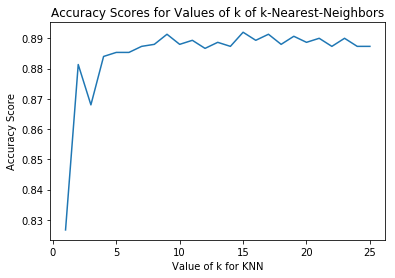

[0.8266666666666667,
 0.8813333333333333,
 0.868,
 0.884,
 0.8853333333333333,
 0.8853333333333333,
 0.8873333333333333,
 0.888,
 0.8913333333333333,
 0.888,
 0.8893333333333333,
 0.8866666666666667,
 0.8886666666666667,
 0.8873333333333333,
 0.892,
 0.8893333333333333,
 0.8913333333333333,
 0.888,
 0.8906666666666667,
 0.8886666666666667,
 0.89,
 0.8873333333333333,
 0.89,
 0.8873333333333333,
 0.8873333333333333]

In [13]:
k_range = list(range(1,26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()
scores